In [18]:
###import packages###
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator #formating number in charts
from scipy.stats import trim_mean
import os #to load csv to folder
#new comment

In [19]:
###Connection info for GitHub File###
url = 'https://github.com/TexasTori/ADS500B/raw/23fed13154371851d00cb375e177636726bf8bc2/house_sales.csv'
df_orig = pd.read_csv(url, sep=',')

###set up to automate files print location for team###
cwd = os.getcwd() 
log_prefix = os.path.join(cwd,'log_files')
print(log_prefix)

##'/Users/bobbymarriott/Desktop/Project/house_sales.csv'

C:\Users\Widjaja\ADS500B\log_files


In [20]:
###Uncomment below for testing:###

#df_orig.head()
#df_orig.to_csv(os.path.join(log_prefix, "testpywrite.csv"), index=False)


In order to write data to a csv/txt file on your laptop, use the os.path.join()
###### Example:
df_test is the data you want to print to csv
###### Python:
df_orig.to_csv(os.path.join(log_prefix, "testpywrite.csv"), index=False)

Copy and paste the above code and update the data frame name at the beginning and the text between the " " which will name your file.

In [21]:
###view file sample###
df_orig.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
###Printing out the rows and columns of the dataset to highlight the dimensions###
print("Dimensions", df_orig.shape)

Dimensions (21613, 21)


In [23]:
###The datatypes of each column are found using dtypes()###
print("Data Types:/n", df_orig.dtypes)

Data Types:/n id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## The filetype is csv and the import method was through Pandas

In [24]:
###Null values count###
null_data = df_orig.isnull().sum()
print(null_data)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [25]:
df_orig['price'].describe().apply(lambda x: format(round(x,2), '.2f'))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

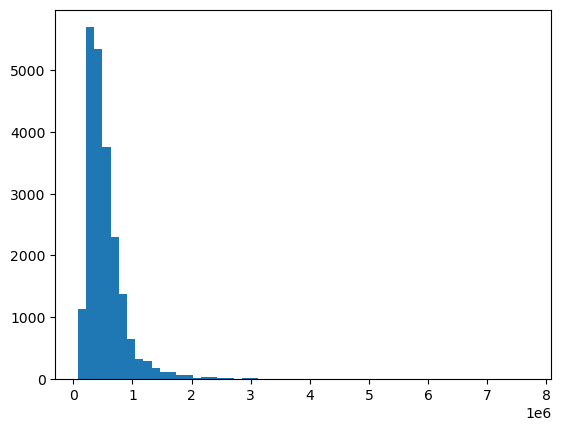

In [26]:
plt.hist(df_orig['price'], bins = 55)
plt.show()

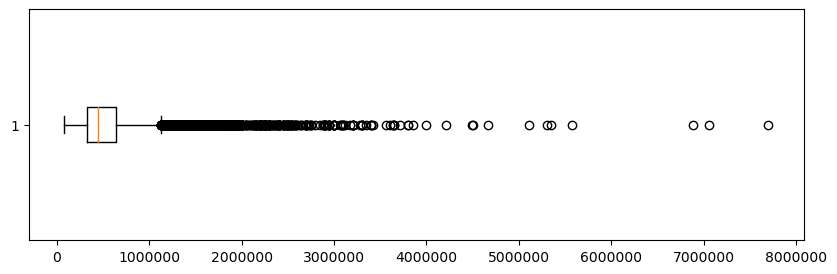

In [27]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.boxplot(df_orig['price'], vert=False)
ax.ticklabel_format(style='plain', axis='x')

###print out###
plt.show()

## Clean, Wrangle and Handle Missing Data Step

In [28]:
# BOBBY

# Taking the current date format with TXXXXX and turning it into a normal date format of YYYY MM DD 

df_orig['date'] = pd.to_datetime(df_orig['date'], format='%Y%m%dT%H%M%S')

# Taking the new format out of the dataframe
df_orig['date'] = df_orig['date'].dt.date

# Saving a new edited CSV and then printing it out to show 
#df.to_csv('house_file_v2.csv', index=False)
df_orig.to_csv(os.path.join(log_prefix, "house_file_v2.csv"), index=False)


date_time_cleaned = pd.read_csv('house_file_v2.csv')

print(date_time_cleaned.head())

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192  2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400  2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875  2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510  2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      19

In [29]:
# Working with the new dataframe created for the date change
# Drop 0 bedrooms or 0 bathrooms
date_time_cleaned = pd.read_csv('/Users/bobbymarriott/Desktop/Project/house_file_v2.csv')

# We do not want to show any home with 0 bedrooms or 0 bathrooms
date_time_cleaned = date_time_cleaned[(date_time_cleaned['bedrooms'] != 0) & (date_time_cleaned['bathrooms'] != 0)]

# Saving this into a new csv again
date_time_cleaned.to_csv('filtered_date_time_cleaned.csv', index=False)

# Describing the new edited csv file with a now lower count

date_time_cleaned['price'].describe().apply(lambda x: format(round(x,2), '.2f'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bobbymarriott/Desktop/Project/house_file_v2.csv'

In [ ]:
# Removing the top and bottom 1% of data in the price column 
date_time_cleaned = pd.read_csv('filtered_date_time_cleaned.csv')

# Establishing lower and upper bound using the bottom and upper 1%
upper_bound = date_time_cleaned['price'].quantile(0.99)
lower_bound = date_time_cleaned['price'].quantile(0.01)

# Only extracting the data in between the values above the lower bound and values lower than the upper bound
date_time_cleaned = date_time_cleaned[(date_time_cleaned['price'] >= lower_bound) & (date_time_cleaned['price'] <= upper_bound)]

date_time_cleaned.to_csv('filtered_price_cleaned.csv', index=False)

# Describing the new dataframe with lower counts again as well as a new mean of 522,238 instead of the previous 
# 540,200
date_time_cleaned['price'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
# BOBBY AND TORI

# GroupBy Price, each of these 4 columns // Imputing
create 4 groups for Price,

In [ ]:
# PATRICIO

# Import necessary libraries
import pandas as pd

# Transform data with aggregation, normalization, and feature construction
##Need to add the new clean file
# Create a new column 'price per square foot' using the house price and the sqft_living
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']

# Normalize the 'price_per_sqft' column to have a mean of 0 and std of 1
df_clean['price_per_sqft_normalized'] = (df_clean['price_per_sqft'] - df_clean['price_per_sqft'].mean()) / df['price_per_sqft'].std()

# Aggregation: Calculate the average price per square foot for each zipcode
avg_price_per_sqft = df_orig.groupby('zipcode')['price_per_sqft'].mean().reset_index(name='avg_price_per_sqft')
df_2 = df_orig.merge(avg_price_per_sqft, on='zipcode', how='left')

# Turn condition column into categorical data
df_2['condition'] = df_orig['condition'].astype('category')

# Convert year built to age
current_year = 2023
df_2['age'] = current_year - df['yr_built']

# Change '33' bedrooms to '3'
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

pd.set_option('display.max_columns', None)
df.head()


In [ ]:
#EVERYONE 

# Reduce redudnant data and perform need-based discretization 

# Removing duplicates

# Remove view, grade, long/lat 